# Classify the data shown in the MNIST data


* Do this using the best practices discussed in class (i.e. one hot encoding, ReLU, CNNS when you should, etc.)

* Have reasonable hyperparameters


In [1]:
# Importing the libraries
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix





/home/anirudh/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading the Training and Testing Data

In [2]:
# Loading the Training and Testing Data
trainImages = np.load('./MNIST/trainImages.npy')
testImages = np.load('./MNIST/testImages.npy')
trainLabels = np.load('./MNIST/trainLabels.npy')
testLabels = np.load('./MNIST/testLabels.npy')

# Converting to Float32 to do input data Normalization

In [3]:
# Converting to Float32 to do input dat# Loading the Training and Testing Dataa Normalization
trainImages = trainImages.astype('float32') #images loaded in as int64, 0 to 255 integers
testImages = testImages.astype('float32')
# Normalization
trainImages /= 255
testImages /= 255

# Showing the Input Data after Normalizing

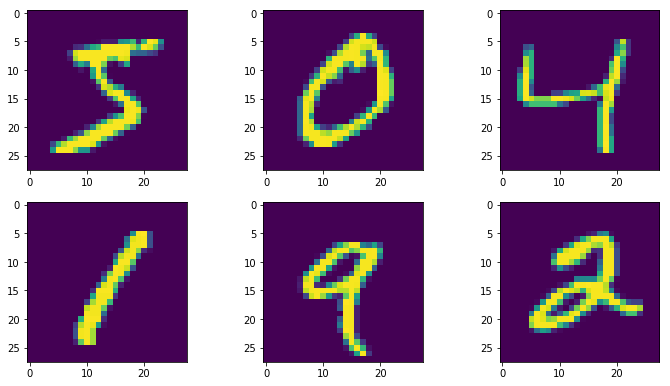

In [4]:
# Preview the training data
plt.figure(figsize=(12,10))
x, y = 3, 3
for i in range(6):  
    plt.subplot(y, x, i+1)
    plt.imshow(trainImages[i].reshape((28,28)),interpolation='nearest')
plt.show()

# Setting Hyper Paramters

In [5]:
# Hyper Parameters
batch_size = 32
num_classes = testLabels.shape[1]
epochs = 10

# Creating Sequential Model

In [6]:
# create model
img_rows, img_cols = 28, 28
input_shape = (1,img_rows, img_cols)
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',data_format='channels_first',use_bias=True ,
#                  bias_initializer = keras.initializers.glorot_uniform(seed=None),
                 input_shape=input_shape))          # Adding weights for tuning
model.add(Conv2D(32, (3, 3), activation='relu'))    # Added another layer as this 
                                                    # smoothens the training accuracy curve
model.add(MaxPooling2D(pool_size=(2, 2)))           # Reducing the parmaters
model.add(Dropout(0.25))                            # Adding non linearity and randomness
model.add(Flatten())                                # Converting to 1D as required before  
                                                    # fully connected layer.
model.add(Dense(128, activation='relu'))            # fully connected layer with 128 hidden units
model.add(Dropout(0.45))                            # Adding non linearity and randomness
model.add(Dense(num_classes, activation='softmax')) # Final fully connected layer.

# Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
# Get Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 26, 26)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 24, 32)        7520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11904)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1523840   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# Weights and Biases for First Layer 

In [7]:
# Before Training
weights = model.layers[0].get_weights()
w0 = np.array(weights[0])
b0 = np.array(weights[1])
print("The weights for first layer has dimensions of " + str(w0.shape))
print()
print("The Biases for first layer has dimensions of " + str(b0.shape)+" and the values are :\n" + str(b0))
print()
print("Just so we know that the weights have changed after training,\
 we will be comparing the sum of weights of the first layer before and after training.")
print()
print("The sum of weights of the first layer is :" + str(w0.sum()))
print("The sum of biases of the first layer is :" + str(b0.sum()))



The weights for first layer has dimensions of (3, 3, 1, 64)

The Biases for first layer has dimensions of (64,) and the values are :
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Just so we know that the weights have changed after training, we will be comparing the sum of weights of the first layer before and after training.

The sum of weights of the first layer is :-0.89286906
The sum of biases of the first layer is :0.0


# Training the Model

Training Loss: 0.03027751198658128
Training Accuracy: 0.9902166666666666

Validation Loss: 0.04407373062672932
Validation Accuracy: 0.9906



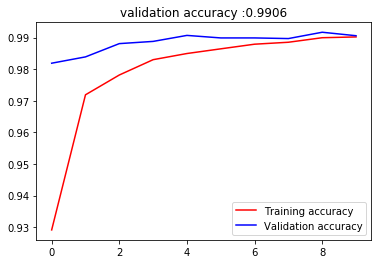

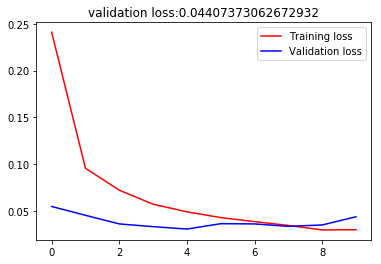

In [8]:
# Train 
# Here I have considered the test data as the validation data.
h = model.fit(trainImages, trainLabels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
validation_data=(testImages, testLabels))

# Evaluate Accuracy
score = model.evaluate(testImages, testLabels, verbose=0)
print('Training Loss:', h.history['loss'][-1])
print('Training Accuracy:', h.history['acc'][-1])
print()
print('Validation Loss:', h.history['val_loss'][-1])
print('Validation Accuracy:', h.history['val_acc'][-1])
print()

# Plot Graphs
# print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('validation accuracy :' + str(score[1]))
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('validation loss:'+str(score[0]))
plt.legend()
plt.show()



# Inferences
* There are 2 Convolution Layers and 2 Dense or Fully Connected Layers with subsequent Max Pooling and Dropout Layer.
* The number of hidden units in each layer are experimentally fine tuned. The units were experimented in 2^n multiples like 16, 32 , 64 ,128 , 256. 
* ** Input Conv2D layer: ** The weights are initialized by Glorot uniform initializer, which is the default. This is set as the values are nicely zero centered and within -1 and 1.The biases are set to zero as it improves the accuracy by 0.2 as compared to randomly distribued values between (-1 and 1)(found out by experimnetation).This is also recommended as per in CS231 from Standord. 
    * The kernel size is set to minimum of (3,3). This is because the image size is already small (28,28) and by using large kernel size there wont be enough data left to add more convolution layers.
    * the activation is set to RELU, as it is the most recommended and also as the input is normalized between 0 and 1.
* ** Max Pooling layer: ** for pooling Max Pooling is used. Again as the input size is very less. The maxpooling kernel size is set to (2,2). This works as there is still enough information in a (2,2) window and it also does not throw out a lot of valuable data.
* ** Drop Out: ** This is very Essential as it helps prevent over fitting. Two dropout layers are used. 
    * The first one is in between convolution layers. The dropout of 0.25 was determined to be optimal. At this vlaue the convergence of Training accuracy to validation accuracy was smooth and gradual as compared to other values.
    * The second dropout was used just before the final fully connected layer. This is kept at 0.45 as experimnetally determined and is used to reduce overfitting.
* ** Dense Layers: ** Two fully connect layers are used with a dropput in between. This seems to give good performances in MNIST and Fashion MNIST.
    * For final fully connected layer, softmax is used as activation. This is because there are a total of 10 classes and the predicted output can exactly be any one of these classes.
* ** Loss ** : as one hot encoding is used, categorical_crossentropy loss is used as loss function. This is used as it is the most recommended one.
* ** Optimizer ** : Different Optimizers were tried out. For MNIST even with different optimizers there was not a lot of change in the convergence time or the number of epochs. 
    * For example, I used Adagrad and each epoch took 3 seconds less to finish as compared to Adam, but the final validation accuracy was higher for Adam. Therefore I finally decided to use Adam as my optimizers. The default paramteres were not further tuned as the accuracy was already above 99 percent.

#  Weights and Biases for First Layer After Training 

In [9]:
# After Training
weights = model.layers[0].get_weights()
w0 = np.array(weights[0])
b0 = np.array(weights[1])
print("The weights for first layer has dimensions of " + str(w0.shape))
print()
print("The Biases for first layer has dimensions of " + str(b0.shape)+" and the values are :\n" + str(b0))
print()
print("The sum of weights of the first layer is :" + str(w0.sum()))
print("The sum of biases of the first layer is :" + str(b0.sum()))
print("As we can see the sum has changed, indicating that the weights are now tuned.")


The weights for first layer has dimensions of (3, 3, 1, 64)

The Biases for first layer has dimensions of (64,) and the values are :
[-0.0695055   0.06757601 -0.1709299   0.05736716 -0.05625711 -0.00859211
 -0.03032804 -0.04839925 -0.14820492 -0.01303454 -0.02829761 -0.00408949
  0.02921727 -0.02300315  0.06372973 -0.01574015 -0.09737701 -0.02820285
 -0.17450123 -0.07554159 -0.00713212 -0.08186575 -0.11296158 -0.07823884
 -0.06248639  0.02378723  0.00871323 -0.06646944 -0.04796613 -0.09732646
 -0.07466779 -0.01293016 -0.01219311 -0.07616463 -0.02806685 -0.02756438
 -0.00720451 -0.00551827  0.04854751 -0.06112623 -0.01117081 -0.06499381
  0.0147022  -0.10208052 -0.00578168 -0.00893003  0.01993094 -0.004114
 -0.20875984 -0.00225884 -0.12641157 -0.07453895 -0.01771431 -0.0215746
 -0.03626124 -0.06726413 -0.00414854 -0.01427964 -0.0083693   0.01614451
 -0.0476915   0.01532683 -0.201816   -0.09709164]

The sum of weights of the first layer is :-14.237207
The sum of biases of the first layer

# Calculate Confusion Matrix

In [10]:

# Predict the values from the validation dataset
Y_pred = model.predict(testImages)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testLabels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("Confusion Matrix is :\n"+str(confusion_mtx))


Confusion Matrix is :
[[ 977    0    0    1    0    0    1    0    1    0]
 [   0 1129    1    2    0    1    1    0    1    0]
 [   1    1 1020    1    1    0    1    5    2    0]
 [   0    0    1  999    0    4    0    3    2    1]
 [   0    0    0    0  973    0    2    0    2    5]
 [   1    0    0    2    0  883    5    1    0    0]
 [   2    2    0    0    0    1  951    0    2    0]
 [   0    3    4    1    1    0    0 1017    1    1]
 [   4    0    1    0    0    0    1    1  966    1]
 [   0    0    0    1    7    0    0    9    1  991]]


# Incorrect Predictions


Number of Incorrect Predicitons are: 94 out of 10000 inputs

Displaying the top 6 errors


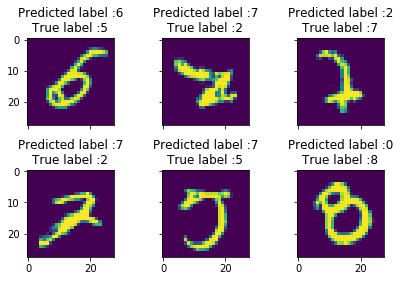

In [11]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)
incorrect = (errors*1).sum()
print ("Number of Incorrect Predicitons are: " + str(incorrect)+ " out of "+ str (errors.size)+" inputs")
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = testImages[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],
                                                                               obs_errors[error]))
            n += 1
    fig.tight_layout()

    
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
print()
print("Displaying the top 6 errors")
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)